## Explicit vs Implicit scheme

Consider a classical problem: mass on a spring with a damper.

<img src="Mass_spring_damper.png" style="height:200px">

It can be described by a second order, homogeneus, linear differatial equation with constant coefficients:

$$ 
m \ddot{x} + c \dot{x} + kx = 0 \Leftrightarrow \\ 
%\Leftrightarrow m \ddot{x} = - c \dot{x} - kx  \\
\Leftrightarrow \ddot{x} = - \frac{c}{m} \dot{x} - \frac{k}{m} x 
$$


Rewrite it 

$$
\underbrace{
\begin{bmatrix}
\ddot{x} \\
\dot{x}
\end{bmatrix}
}_{\boldsymbol{\dot{z}}}
=
\underbrace{
\begin{bmatrix}
- \frac{c}{m} & - \frac{k}{m}\\
            1 & 0 
\end{bmatrix}
}_{\mathbb{A}}
\underbrace{
\begin{bmatrix}
\dot{x}\\
x
\end{bmatrix}
}_{\boldsymbol{z}}
$$


Introducing the variables $ z $ and $ \mathbb{A}$ we can express the equation as

$$
\boldsymbol{\dot{z}} = \mathbb{A}\boldsymbol{z}
$$

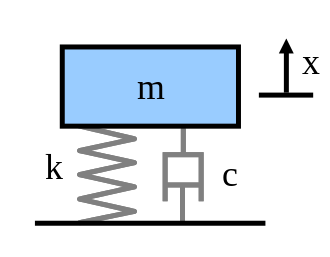

## Energy of the system 

The total Energy of the system can be written as

$$
E_{tot} = E_{pot} + E_{kin} = \frac{1}{2}kx^2 + \frac{1}{2}m \dot{x}^2 
$$

In case of zero dumping, it shall be constant. Check it for each scheme.

## Explicit Scheme

$$
\frac{\boldsymbol{z}_{t+1}-\boldsymbol{z}_{t}}{\Delta t} = \mathbb{A}\boldsymbol{z}_{t}
\Leftrightarrow
$$


$$
\Leftrightarrow
\boldsymbol{z}_{t+1} = 
\underbrace{(\mathbb{1} + \Delta t \mathbb{A})}_{\mathbb{M}_E}\boldsymbol{z}_t
$$


Notice, that in each step the result is multiplied by $ \mathbb{M}_E $.

We can find the [determinant](https://www.youtube.com/watch?v=Ip3X9LOh2dk&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=6&ab_channel=3Blue1Brown)
of the transformation in order to asses the stability of the method.

The stability condition is $ det( \mathbb{M}_E ) \leq 1 $.


Let us calculate the determinant,

$$
det( \mathbb{M}_E )
=
\begin{vmatrix}
1 - \Delta t \frac{c}{m} & - \Delta t \frac{k}{m}\\
                \Delta t & 1 
\end{vmatrix}
= 1 - \Delta t \frac{c}{m} +  \Delta t^2 \frac{k}{m}
$$


Next, the result can be used to find maximum time step which will satisfy the stability condition:

$$
det( \mathbb{M}_I ) \leq 1 \Leftrightarrow \\ 
\Leftrightarrow 1 - \Delta t \frac{c}{m} +  \Delta t^2 \frac{k}{m} \leq 1 \\
\Leftrightarrow \Delta t k - c \leq 0 \\
\Leftrightarrow \Delta t \leq \frac{c}{k}
$$


In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt

In [ ]:
def make_plots(states,time,m,k):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
    fig.suptitle('Mass on a spring with damper')

    ax1.plot(time, states[:,0], linestyle="-", color="green", label='x')
    ax1.plot(time, states[:,1], linestyle="-", color="blue", label=r"$\dot{x}$")
    ax1.set(xlabel='time', ylabel=r'$x, \dot{x}$')
    ax1.set_title(r'$x(t), \dot{x}(t)$')
    ax1.legend(["x",r"$\dot{x}$"],loc="upper right") 
    ax1.grid(which='both')

    ax2.plot(states[:,0], states[:,1], color="red")
    ax2.plot(states[0,0], states[0,1], marker='x', color='black', markersize=8)
    ax2.set(xlabel='x', ylabel=r"$\dot{x}$")
    ax2.set_title(r'trajectory: $\dot{x}$(x)')
    ax2.grid(which='both')

    E_pot = 0.5 * k* states[:,1]**2
    E_kin = 0.5 * m* states[:,0]**2
    E_total = E_kin + E_pot

    ax3.plot(time, E_kin, label='E_{kinetic}', linestyle="-",color="green")
    ax3.plot(time, E_pot, label='E_{potential}', linestyle="-", color="blue")
    ax3.plot(time, E_total, label='E_{total}',marker='', linestyle=":", linewidth=2, color="red",  markevery=int(len(E_total)/75) )
    ax3.set(xlabel='time', ylabel='E')
    ax3.set_title('Energy(t)')
    ax3.legend([r"$E_{kinetic}$",r"$E_{potential}$",r"$E_{total}$"],loc="upper right")
    ax3.grid(which='both')
    # ax3.set_yscale('log')

    plt.show()

In [ ]:
# properties of the system
m = 1           # mass
c = 1e-2*0      # damping coefficient
k = 1e-0        # stiffnes of the spring

# time step - solver settings
T_end = 20              # [s] time to be simulated 
N = int(1e3)            # number of time steps
dt = T_end/N            # time step length
time = dt*np.arange(N)
IC = np.array([1,0])    # IC [position,speed]

# prepare data for computations
# A = np.array([
#     [..., ...],
#     [..., ...]])

In [ ]:

all_states_explicit = np.zeros([N,2])
all_states_explicit[0] = IC



# M_explicit = ...

print(f"dt: {dt} shall be less than c/k={c/k}") 
print(f"determinant M_explicit: {np.linalg.det(M_explicit)}") # determinant =< 1 for stability


for i in range(0,N-1):
    all_states_explicit[i+1] = ...

make_plots(all_states_explicit, time,m,k)

# Impilicit Scheme

In the implicit scheme, the derivative $\boldsymbol{\dot{z}}_{t+1}$ is taken from the future.


$$
\frac{\boldsymbol{z}_{t+1}-\boldsymbol{z}_{t}}{\Delta t} = \mathbb{A}\boldsymbol{z}_{t}
\Leftrightarrow
$$


$$
\Leftrightarrow \boldsymbol{z}_{t+1} = \underbrace{(1 - \Delta t \mathbb{A} )^{-1}}_{\mathbb{M}_I} \boldsymbol{z}_t
$$

To calculate next iteration, a system of equations, $(1 - \Delta t \mathbb{A} )^{-1}$, has to be solved.

Let us calculate the determinant of $\mathbb{M}_I$,

$$
det( \mathbb{M}_I ) 
=
\bigg| 
\begin{bmatrix}
1 + \Delta t \frac{c}{m} &  \Delta t \frac{k}{m}\\
               -\Delta t & 1 
\end{bmatrix}
^{-1}
\bigg|
= \frac{1}{
\bigg|
\begin{bmatrix}
1 + \Delta t \frac{c}{m} &  \Delta t \frac{k}{m}\\
               -\Delta t & 1 
\end{bmatrix}
\bigg|
}
=
\frac{1}{1 + \Delta t \frac{c}{m} + \Delta t^2 \frac{k}{m}}
$$

Since the all the coefficients $m, k, c, \Delta t$ are positive, the epression 

$$
det( \mathbb{M}_I ) \leq 1
$$

is always true. This means, that the implicit scheme is unconditionaly stable.

In [ ]:
# M_implicit = ...
print(f"determinant M_implicit: {np.linalg.det(M_implicit)}") # determinant =< 1 for stability

all_states_implicit = np.zeros([N,2])
all_states_implicit[0] = IC

for i in range(0,N-1):
    # all_states_implicit[i+1] = ...

make_plots(all_states_implicit, time, m, k)

# Midpoint Scheme

In the midpoint scheme, the derivative of $\dot{\boldsymbol{z}}$ is expressed as an average of current and future state.
$$
\frac{\boldsymbol{z}_{t+1}-\boldsymbol{z}_{t}}{\Delta t} = \mathbb{A} \frac{\boldsymbol{z}_{t+1}+\boldsymbol{z}_{t}}{2}
\Leftrightarrow
$$


$$
\Leftrightarrow 
\left(1 - \frac{\Delta t}{2} \mathbb{A} \right) 
\boldsymbol{z}_{t+1} 
= 
\left(1 + \frac{\Delta t}{2} \mathbb{A} \right) 
\boldsymbol{z}_t 
$$

$$
\Leftrightarrow \boldsymbol{z}_{t+1} 
= 
\underbrace{\left(1 - \frac{\Delta t}{2} \mathbb{A} \right)^{-1}}_{\mathbb{M}_{Mid_I}}
\underbrace{\left(1 + \frac{\Delta t}{2} \mathbb{A} \right)}_{\mathbb{M}_{Mid_{II}}} 
\boldsymbol{z}_t 
$$


In [ ]:
# M_midpoint_partI = ...
# M_midpoint_partII = ...
# M_midpoint = ... merge M_midpoint_partI and M_midpoint_partII

print(f"determinant M_midpoint: {np.linalg.det(M_midpoint)}")

all_states_midpoint = np.zeros([N,2])
all_states_midpoint[0] = IC

for i in range(0,N-1):
    # all_states_midpoint[i+1] = ...

make_plots(all_states_midpoint, time, m, k)

# Frequency of oscillations

Let us analyze the analitical solution of the oscilator.

$$ 
m \ddot{x} + c \dot{x} + kx = 0 
$$

Assuming a solution of form $x(t)= e^{rt}$, the derivatives reads $ \dot{x} = r e^{rt}$ and $\ddot{x} = r^2 e^{rt}$.

After pluging in and dividing by $ e^{rt}$, the characteristic equation appears as:

$$ 
m r^2 + c r + k = 0 
$$


when $ c^2 -4mk < 0 $ the general solution is known as[<sup>1</sup>](#fn1) 


$$ 
x(t) = e^{\alpha t} \left[A cos(\omega t) + B sin(\omega t) \right] =  C e^{\alpha t}  cos(\omega t - \phi_0)
$$

where

$$
\alpha = - \frac{c}{2m} \hspace{2em} and \hspace{2em} \omega=\frac{\sqrt{4mk - c^2}}{2m}
$$


Conclusions

* The frequency of oscillations, $ \omega $ are **always decreasing** due to the damping $ c $.

* Observe the existence of the **numerical dumping** (aka numerical viscosity) in the implicit scheme.

* Run the case with $c=0$ and check!

* When $ c^2 -4mk \geq 0 $ then there are no oscilations.

## Conservation of the system's energy

In case of no dumping $\omega=\sqrt{k/m}$.
For simplicity, assume $\phi_0=0$ then,

$$
x = C cos(\omega t) \\
\dot{x} = - C sin(\omega t) 
$$



It is easy to show that the total energy is conserved:

$$
E_{total}  = \frac{1}{2}kx^2 + \frac{1}{2}m \dot{x}^2  
= \frac{C}{2} \left[ m \omega^2 sin^2(\omega t) + k cos^2(\omega t)   \right] = \frac{kC}{2}
$$

Remember that $1 = cos^2(\omega t) + sin^2(\omega t)$.

---
<span id="fn1"> "Analiza matematyczna w zadaniach, część II", W. Krysicki, L. Włodarski., 1974, Rozdział XIII, str. 288-289.</span>

In [ ]:
# Frequency domain representation
# inspired by:
# https://pythontic.com/visualization/signals/fouriertransform_fft

# Add the waves
amplitude = all_states_implicit[:,0] + all_states_explicit[:,0]
# amplitude = all_states_implicit[:,0]
# amplitude = all_states_explicit[:,0]

fourierTransform = np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude
fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency

samplingFrequency = 1./dt

tpCount     = len(amplitude)
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/samplingFrequency
frequencies = values/timePeriod


# Frequency domain representation
# Create subplot

figure, axis = plt.subplots(3, 1)
plt.subplots_adjust(hspace=1)
# Time domain representation for  wave 1
axis[0].set_title('Explicit')
axis[0].plot(time, all_states_explicit[:,0])
axis[0].set_xlabel('Time')
axis[0].set_ylabel('Amplitude')

# Time domain representation for wave 2
axis[1].set_title('Implicit')
axis[1].plot(time, all_states_implicit[:,0])
axis[1].set_xlabel('Time')
axis[1].set_ylabel('Amplitude')

# Frequency domain representation
axis[2].set_title('Fourier transform depicting the frequency components')
axis[2].plot(frequencies, abs(fourierTransform))
axis[2].set_xlabel('Frequency')
axis[2].set_ylabel('Amplitude')
plt.show()

##
beta_undamped = np.sqrt(4*m*k)/(2*m) # [rad/s]
beta_damped = np.sqrt(4*m*k-c*c)/(2*m) # [rad/s]

print(f"beta_damped = {beta_damped/(2*np.pi):.4e} [Hz] \t beta_undamped = {beta_undamped/(2*np.pi):.4e} [Hz]")
print(f"frequency peak at = {frequencies[int(np.argmax(abs(fourierTransform)))]:.4e} [Hz]")
